In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ROOT_DIR = "./dataset"
TRAIN_DIR = os.path.join(ROOT_DIR, "train")
VAL_DIR = os.path.join(ROOT_DIR, "val")

classes = sorted(os.listdir(TRAIN_DIR))
print("Classes:", classes)

Classes: ['no', 'sphere', 'vort']


In [6]:
def count_samples(split_dir):
    counts = {}
    for cls in os.listdir(split_dir):
        cls_path = os.path.join(split_dir, cls)
        counts[cls] = len([f for f in os.listdir(cls_path) if f.endswith(".npy")])
    return counts

train_counts = count_samples(TRAIN_DIR)
val_counts = count_samples(VAL_DIR)

print("Train counts:", train_counts)
print("Val counts:", val_counts)

Train counts: {'no': 10000, 'sphere': 10000, 'vort': 10000}
Val counts: {'no': 2500, 'sphere': 2500, 'vort': 2500}


In [7]:
sample_class = classes[0]
sample_path = os.path.join(TRAIN_DIR, sample_class,
                           os.listdir(os.path.join(TRAIN_DIR, sample_class))[0])

img = np.load(sample_path)

print("Shape:", img.shape)
print("Min:", img.min())
print("Max:", img.max())
print("Dtype:", img.dtype)

Shape: (1, 150, 150)
Min: 0.0
Max: 1.0
Dtype: float64


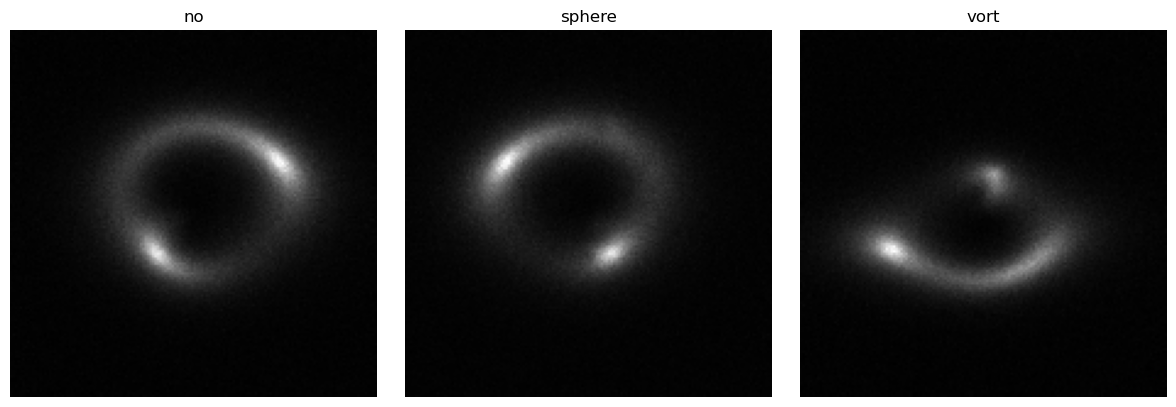

In [9]:
plt.figure(figsize=(12,4))

for i, cls in enumerate(classes):
    cls_dir = os.path.join(TRAIN_DIR, cls)
    img_path = os.path.join(cls_dir, os.listdir(cls_dir)[0])
    img = np.load(img_path)
    img = img.squeeze(0)

    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

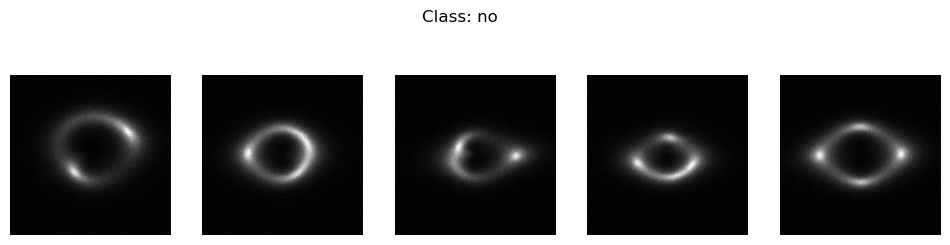

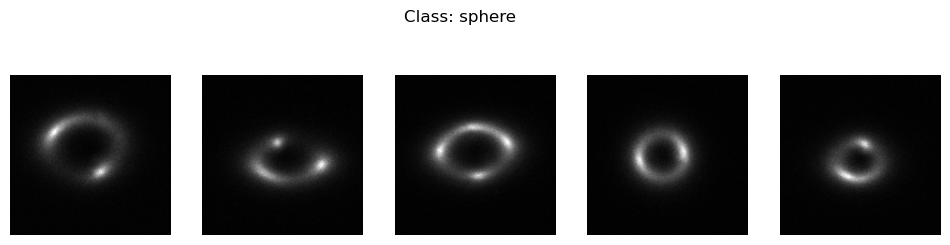

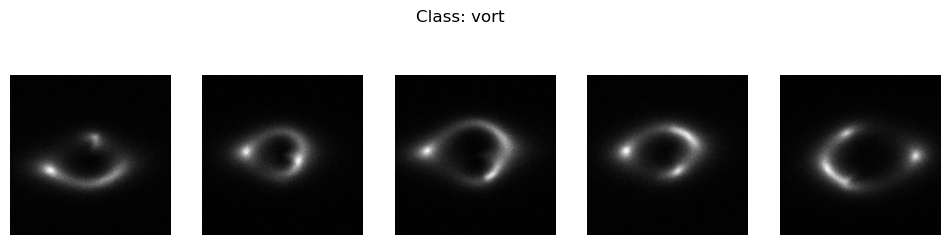

In [11]:
num_samples = 5

for cls in classes:
    cls_dir = os.path.join(TRAIN_DIR, cls)
    files = os.listdir(cls_dir)[:num_samples]

    plt.figure(figsize=(12,3))
    plt.suptitle(f"Class: {cls}")

    for i, fname in enumerate(files):
        img = np.load(os.path.join(cls_dir, fname))
        img = img.squeeze(0)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")

    plt.show()

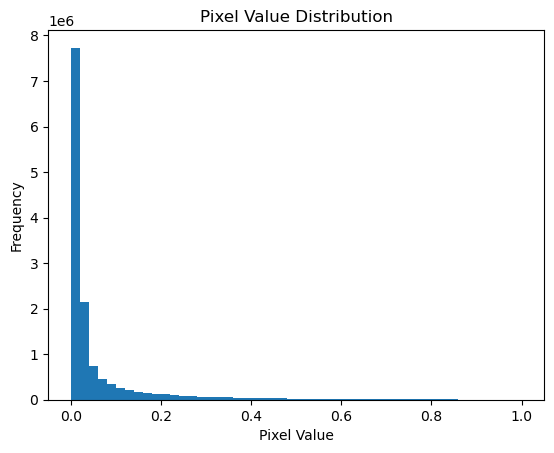

In [12]:
all_pixels = []

for cls in classes:
    cls_dir = os.path.join(TRAIN_DIR, cls)
    files = os.listdir(cls_dir)[:200]  # sample subset

    for fname in files:
        img = np.load(os.path.join(cls_dir, fname))
        img = img.squeeze(0)
        all_pixels.append(img.flatten())

all_pixels = np.concatenate(all_pixels)

plt.hist(all_pixels, bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

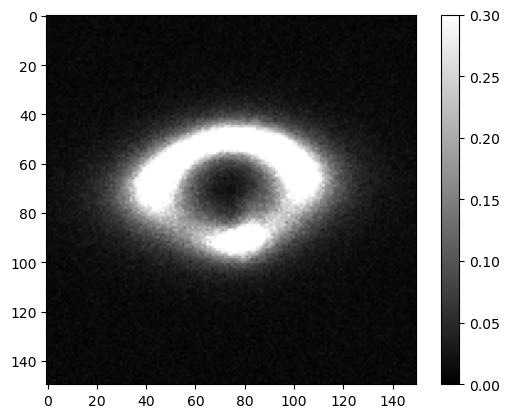

In [13]:
plt.imshow(img.squeeze(), cmap="gray", vmin=0, vmax=0.3)
plt.colorbar()
plt.show()

In [16]:
img[:,:]

array([[0.00743494, 0.01858736, 0.01115242, ..., 0.01239157, 0.01486989,
        0.01115242],
       [0.01239157, 0.01239157, 0.01239157, ..., 0.00371747, 0.01363073,
        0.01858736],
       [0.01610905, 0.01363073, 0.00619579, ..., 0.00619579, 0.0086741 ,
        0.00743494],
       ...,
       [0.01239157, 0.01486989, 0.00495663, ..., 0.00743494, 0.01486989,
        0.00991326],
       [0.00991326, 0.00743494, 0.01982652, ..., 0.01610905, 0.0086741 ,
        0.0086741 ],
       [0.01115242, 0.01115242, 0.01115242, ..., 0.00743494, 0.00619579,
        0.01239157]], shape=(150, 150))